In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the various libraries

In [54]:
df=pd.read_csv('Chocolate Sales.csv')
# Importing and Reading the dataset from pandas

In [55]:
df.head()
# Show first 5 rows to get an overview of data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [56]:
df.info()
# Information of each columns: data types, non-null counts
# Observations: No Missing values, only Boxes shipped have number datatype and others are 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [57]:
df.describe()
# Give the statistical data of the columns of numeric datatypes
# count,mean,std,min,max,percentiles.
# Observation: mean is 161 boxes are shipped.
# It has a wide range with possible outliers as max=709 but mean is 161.

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [58]:
df.isnull().sum()
# it is showing the total numbers of Null values in each column

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [59]:
missing_boxes=df[df['Boxes Shipped'].isnull()]
display(missing_boxes)
# To check Null Values in Boxes Shiped column
# No Null values in Boxes Shipped column

,Sales Person,Country,Product,Date,Amount,Boxes Shipped


In [60]:
df['Product'].fillna(df['Product'].mode()[0])
# To fill NA values of Product with mode of Product, if there is any NA values.

0           Mint Chip Choco
1             85% Dark Bars
2       Peanut Butter Cubes
3       Peanut Butter Cubes
4       Peanut Butter Cubes
               ...         
1089    Spicy Special Slims
1090             White Choc
1091    Organic Choco Syrup
1092                Eclairs
1093         70% Dark Bites
Name: Product, Length: 1094, dtype: object

In [61]:
# Handling Categorical Variables
df['Country']=df['Country'].map({'UK':0,'India':1,'USA':2,'Australia':3,'New Zealand':4,
                                 'Canada':5})
print(df.head())

df.info()
# Dtype converted from object to float64 for Country.
# UK=0, India=1, USA=2, Australia=3, New Zealand=4, Canada=5.

     Sales Person  Country              Product       Date    Amount  \
0  Jehu Rudeforth        0      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell        1        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling        1  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth        3  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth        0  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   int64 
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dty

## One Hot Encoding

In [63]:
df=pd.get_dummies(df,columns=['Product'])
df
# It transforms categorical variables into a binary format.
# Product is now transformed into dummy variables.

,Sales Person,Country,Date,Amount,Boxes Shipped,Product_50% Dark Bites,Product_70% Dark Bites,Product_85% Dark Bars,Product_99% Dark & Pure,Product_After Nines,...,Product_Manuka Honey Choco,Product_Milk Bars,Product_Mint Chip Choco,Product_Orange Choco,Product_Organic Choco Syrup,Product_Peanut Butter Cubes,Product_Raspberry Choco,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc
0,Jehu Rudeforth,0,04-Jan-22,"$5,320",180,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,Van Tuxwell,1,01-Aug-22,"$7,896",94,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Gigi Bohling,1,07-Jul-22,"$4,501",91,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Jan Morforth,3,27-Apr-22,"$12,726",342,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,Jehu Rudeforth,0,24-Feb-22,"$13,685",184,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,3,17-May-22,"$4,410",323,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1090,Jehu Rudeforth,2,07-Jun-22,"$6,559",119,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1091,Ches Bonnell,5,26-Jul-22,$574,217,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1092,Dotty Strutley,1,28-Jul-22,"$2,086",384,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df['Country']=df['Country'].astype('category')
df.info()
# Convert Country to categorical variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Sales Person                  1094 non-null   object  
 1   Country                       1094 non-null   category
 2   Date                          1094 non-null   object  
 3   Amount                        1094 non-null   object  
 4   Boxes Shipped                 1094 non-null   int64   
 5   Product_50% Dark Bites        1094 non-null   bool    
 6   Product_70% Dark Bites        1094 non-null   bool    
 7   Product_85% Dark Bars         1094 non-null   bool    
 8   Product_99% Dark & Pure       1094 non-null   bool    
 9   Product_After Nines           1094 non-null   bool    
 10  Product_Almond Choco          1094 non-null   bool    
 11  Product_Baker's Choco Chips   1094 non-null   bool    
 12  Product_Caramel Stuffed Bars  1094 non-null   bo

## Univariate Analysis (Single Feature Analysis)

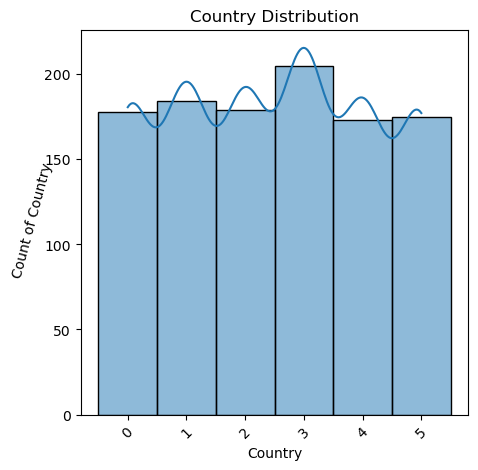

In [66]:
plt.figure(figsize=(5,5))
sns.histplot(df['Country'],kde=True)
plt.title('Country Distribution')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count of Country',rotation=75)
plt.show()
# Histogram plot of Country Distribution
# THe distribution of Chocolate is more in country 3 which is Australia.

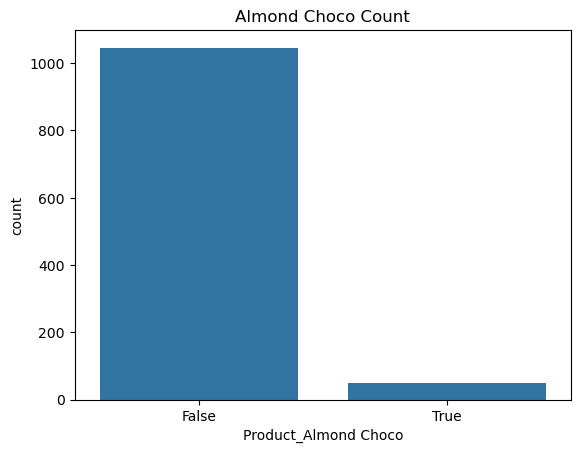

In [67]:
sns.countplot(x='Product_Almond Choco',data=df)
plt.title('Almond Choco Count')
plt.show()
# Countplot of ALmond Choco
# Sale of Product_Almond Choco (true) is less than other products (false).

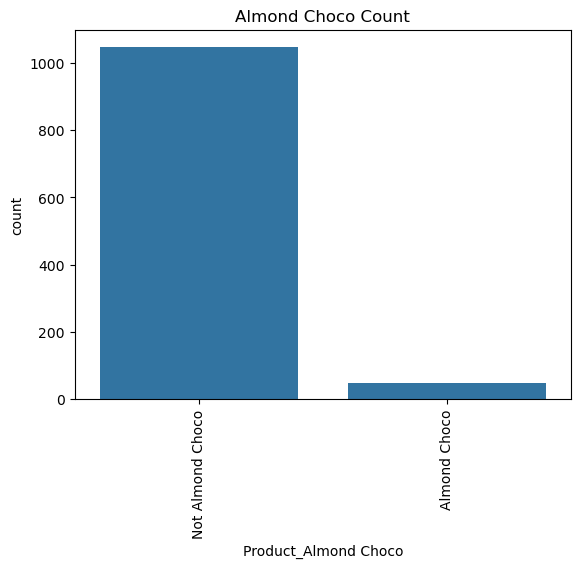

In [68]:
data=df.copy()
sns.countplot(x='Product_Almond Choco',data=df)
plt.title('Almond Choco Count')
plt.xticks(['False','True'],['Not Almond Choco','Almond Choco'],rotation=90)
plt.show()
#Changing the x-axes labels into False-Not Almond Choco and True-Almond Choco.

## Bivariate Analysis

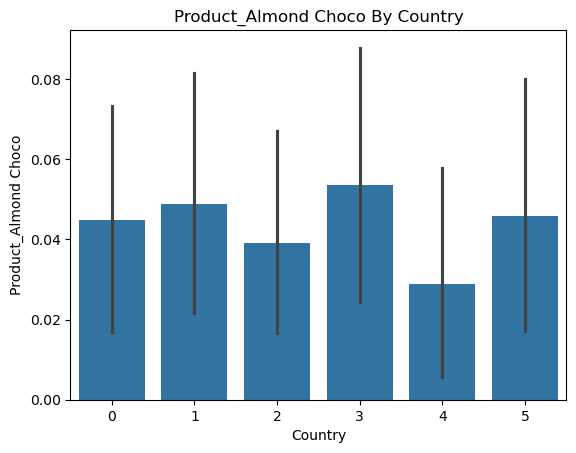

In [70]:
sns.barplot(x='Country',y='Product_Almond Choco',data=df)
plt.title('Product_Almond Choco By Country')
plt.show()
# Country 3(Australia) have more Almond choco products than other countries.

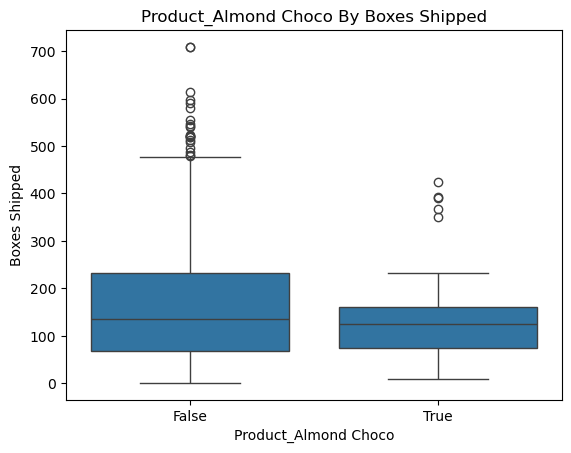

In [71]:
sns.boxplot(x='Product_Almond Choco',y='Boxes Shipped',data=df)
plt.title('Product_Almond Choco By Boxes Shipped')
plt.show()
# Almond Choco Products boxes are shipped less than other products.

In [72]:
df['Country']=df['Country'].astype('float')
# Converting Country data type to numeric as heatmap requires number type of data

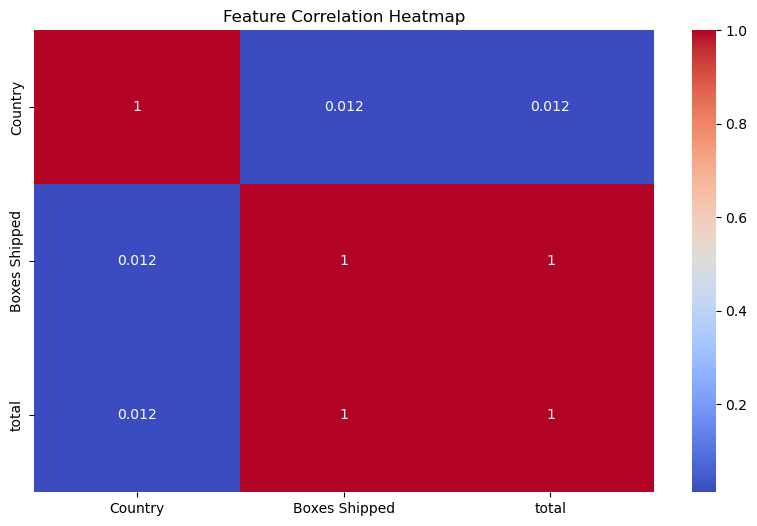

In [108]:
# Select only numeric columns for correlation matrix
numeric_df=df.select_dtypes(include=['number'])
# Compute correlation matrix
corr_matrix=numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [74]:
# Feature Engineering
# Create Total feature 
df['total']=df['Boxes Shipped']+100
df
# Total is created, which could influence boxes shipped

,Sales Person,Country,Date,Amount,Boxes Shipped,Product_50% Dark Bites,Product_70% Dark Bites,Product_85% Dark Bars,Product_99% Dark & Pure,Product_After Nines,...,Product_Milk Bars,Product_Mint Chip Choco,Product_Orange Choco,Product_Organic Choco Syrup,Product_Peanut Butter Cubes,Product_Raspberry Choco,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc,total
0,Jehu Rudeforth,0.0,04-Jan-22,"$5,320",180,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,280
1,Van Tuxwell,1.0,01-Aug-22,"$7,896",94,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,194
2,Gigi Bohling,1.0,07-Jul-22,"$4,501",91,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,191
3,Jan Morforth,3.0,27-Apr-22,"$12,726",342,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,442
4,Jehu Rudeforth,0.0,24-Feb-22,"$13,685",184,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,3.0,17-May-22,"$4,410",323,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,423
1090,Jehu Rudeforth,2.0,07-Jun-22,"$6,559",119,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,219
1091,Ches Bonnell,5.0,26-Jul-22,$574,217,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,317
1092,Dotty Strutley,1.0,28-Jul-22,"$2,086",384,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,484


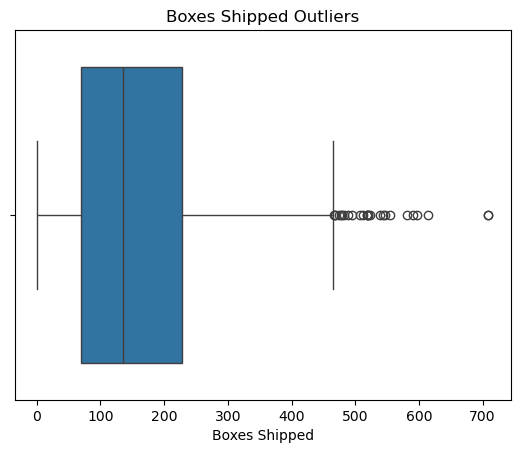

In [99]:
# Outliner Detection
# Boxplot for Boxes Shipped
sns.boxplot(x=df['Boxes Shipped'])
plt.title('Boxes Shipped Outliers')
plt.show()
# There are some outliers in Boxes Shipped Distribution.

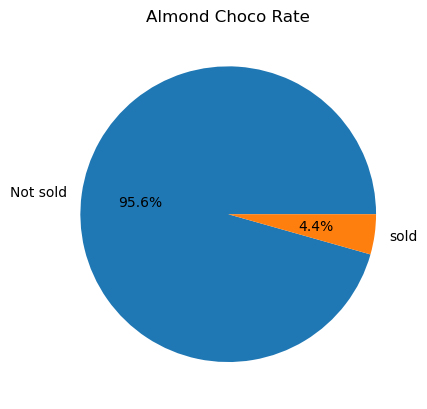

In [76]:
# Pie Chart for Almond_choco
Almond_choco=df['Product_Almond Choco'].value_counts()
plt.pie(Almond_choco,labels=['Not sold','sold'],autopct='%1.1f%%')
plt.title('Almond Choco Rate')
plt.show()
# About 4.4% of Almond Choco Sold in Products

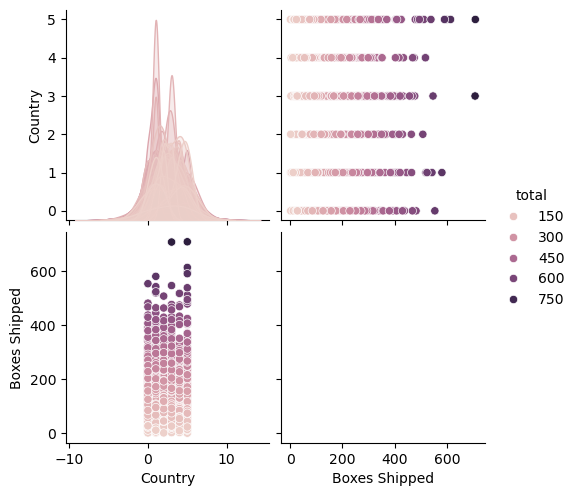

In [77]:
# Pairplot
sns.pairplot(df[['Country','Boxes Shipped','total']],hue='total')
plt.show()

# There are 150-300 boxes are mostly Shipped.
# Country 5 and 3 have highest boxes shipped.
# Pair plot b/w the country and boxes shipped 
# graph and the color aspects is based on total.